In [1]:
import numpy as np
import os
import h5py
import time
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from utils_2 import *

In [2]:
plt.rcParams["figure.figsize"] = (5, 4)
np.random.seed(2020)

In [3]:
def load_data():
    train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('data/test_catvnoncat.h5', "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes

In [4]:
X_train, Y_train, X_test, Y_test, classes = load_data()

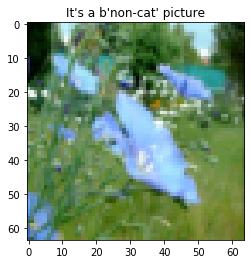

In [5]:
index = 20
plt.imshow(X_train[index])
plt.title("It's a {} picture".format(classes[Y_train[0, index]]))
plt.show()

In [6]:
m_train = X_train.shape[0]
img_pixels = X_train.shape[1]
m_test = X_test.shape[0]

m_train, img_pixels, m_test

(209, 64, 50)

In [7]:
X_trainf = X_train.reshape(X_train.shape[0], -1).T
X_testf = X_test.reshape(X_test.shape[0], -1).T

XX_train = X_trainf / 255.
XX_test = X_testf / 255.

XX_train.shape, XX_test.shape

((12288, 209), (12288, 50))

In [8]:
n_x = 64*64*3
n_h = 7
n_y = 1
layer_dims = (n_x, n_h, n_y)

In [9]:
def two_layer_model(X, Y, layer_dims, learning_rate=0.0075, num_iters=3000, print_cost=False):
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layer_dims
    
    params = init_params(n_x, n_h, n_y)
    
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    for i in range(num_iters):
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        cost = compute_cost(A2, Y)
        
        # initializing backprop
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        params = update_params(params, grads, learning_rate)
        
        W1 = params["W1"]
        b1 = params["b1"]
        W2 = params["W2"]
        b2 = params["b2"]
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))

    plt.plot(np.squeeze(costs))
    plt.ylabel("cost")
    plt.title("Learning rate: {}".format(learning_rate))
    plt.show()
    
    return params

Cost after iteration 0: 0.6916371529390172
Cost after iteration 100: 0.6466010613584112
Cost after iteration 200: 0.6326583947263713
Cost after iteration 300: 0.6003117816494776
Cost after iteration 400: 0.5566272768854515
Cost after iteration 500: 0.5115916899035956
Cost after iteration 600: 0.47009481980779366
Cost after iteration 700: 0.42350164595498996
Cost after iteration 800: 0.37895535762596183
Cost after iteration 900: 0.3600147331286786
Cost after iteration 1000: 0.31680801123166796
Cost after iteration 1100: 0.28461691716547927
Cost after iteration 1200: 0.2019411558608178
Cost after iteration 1300: 0.1740569692937238
Cost after iteration 1400: 0.16961806462946805
Cost after iteration 1500: 0.18447171242510482
Cost after iteration 1600: 0.10895617704955832
Cost after iteration 1700: 0.08860636660979165
Cost after iteration 1800: 0.08245785142682155
Cost after iteration 1900: 0.06508241257056978
Cost after iteration 2000: 0.056472093483167875
Cost after iteration 2100: 0.0494

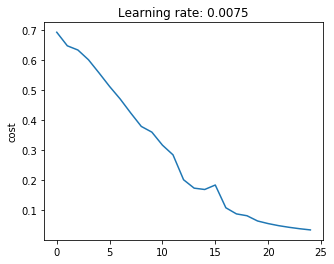

In [10]:
params = two_layer_model(XX_train, Y_train, layer_dims=layer_dims, num_iters = 2500, print_cost=True)